In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
exames = pd.read_csv('/content/drive/MyDrive/SIRIO_LIBANES/HSL_Exames_4.csv', sep='|')
desfecho = pd.read_csv("/content/drive/MyDrive/SIRIO_LIBANES/HSL_Desfechos_4.csv", sep='|')
Pacientes = pd.read_csv("/content/drive/MyDrive/SIRIO_LIBANES/HSL_Pacientes_4.csv", sep='|')

In [ ]:
novo_sirio_pp = exames.merge(desfecho, on = ["ID_PACIENTE", "ID_ATENDIMENTO"], how = "left")
novo_sirio_pp = novo_sirio_pp.merge(Pacientes, on = ["ID_PACIENTE"], how = "left")

In [ ]:
#REMOVENDO ACENTOS - EXAMES
cols = novo_sirio_pp.select_dtypes(include=[np.object]).columns
novo_sirio_pp[cols] = novo_sirio_pp[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
novo_sirio_pp = novo_sirio_pp.apply(lambda x: x.astype(str).str.upper())

In [ ]:
#REMOVENDO COLUNAS DESNECESSÁRIAS PARA AM

df1_am= novo_sirio_pp.drop(columns=['DE_ORIGEM', 'DE_VALOR_REFERENCIA', 'DE_TIPO_ATENDIMENTO', 'ID_CLINICA',
                         'DE_CLINICA', "CD_PAIS", 'CD_UF', 'CD_MUNICIPIO', 'CD_CEPREDUZIDO'])

In [ ]:
#DETERMINANDO O ESTADO DE GRAVIDADE

df1_am = df1_am[df1_am.DT_COLETA != 'DDMMAA']  #Excluindo linhas DDMMAA
df1_am = df1_am[df1_am.DT_ATENDIMENTO != 'DDMMAA']  #Excluindo linhas DDMMAA
df1_am = df1_am[df1_am.DT_DESFECHO != 'DDMMAA']  #Excluindo linhas DDMMAA

In [ ]:
df1_am['DT_DESFECHO'] = pd.to_datetime(df1_am['DT_DESFECHO'])
df1_am['DT_ATENDIMENTO'] = pd.to_datetime(df1_am['DT_ATENDIMENTO'])
df1_am['DT_COLETA'] = pd.to_datetime(df1_am['DT_COLETA'])

In [ ]:
df1_am

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DT_ATENDIMENTO,DT_DESFECHO,DE_DESFECHO,IC_SEXO,AA_NASCIMENTO,DIAS_HOSPITAL
0,9BB15EA1D912994DE467C71E953F6ACC,E7E88B60259AD5C9CF3A837260CB8CC7,2021-01-22,17 HIDROXIPREGNENOLONA,17-HIDROXI PREGNENOLONA,23,NG/DL,2021-01-18,2021-01-22,ALTA ADMINISTRATIVA,F,1987,4.0
1,FB48065512F8BFFAE3FC16530785BB57,E9E678082F3C9EA1C8F00DC5881049F6,2020-09-24,17 HIDROXIPREGNENOLONA,17-HIDROXI PREGNENOLONA,27,NG/DL,2020-09-24,2020-09-24,ALTA ADMINISTRATIVA,F,1994,0.0
2,5ABF34B0AE202F876BDAA0F338881BC1,248AD10D114DEC5A0FF184548FAD4EDA,2021-02-25,17 HIDROXIPREGNENOLONA,17-HIDROXI PREGNENOLONA,50,NG/DL,2021-02-25,2021-02-25,ALTA ADMINISTRATIVA,F,1979,0.0
3,9DECD77C85AD8EF58C52F5D747546632,F1C30774A4B98ECA55D2DF430DFA0025,2020-06-10,17 HIDROXIPREGNENOLONA,17-HIDROXI PREGNENOLONA,44,NG/DL,2020-06-10,2020-06-10,ALTA ADMINISTRATIVA,F,1982,0.0
4,F59A53116E97CB53C79DF6C69C04E605,D69D300246722272C2A60C5875CFC2E0,2021-05-20,17 HIDROXIPREGNENOLONA,17-HIDROXI PREGNENOLONA,INFERIOR A 13,NG/DL,2021-05-20,2021-05-20,ALTA ADMINISTRATIVA,M,1969,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952990,DE939902355FAE9117BAEF42AE807322,76E58038D4E554A18E5318540BCF064D,2021-12-05,DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...,DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...,DETECTADO,-,2021-04-19,2021-05-28,ALTA MEDICA MELHORADO,M,1951,39.0
2952991,1E3B3E54FE548B2C6C406BF673A874E6,C8ABB0501B0AA07E55CFB0398A613203,2021-05-04,DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...,DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...,DETECTADO,-,2021-05-04,2021-04-28,ALTA MEDICA MELHORADO,M,1981,-6.0
2952993,CAB1E16AB63809C50057AF398FC2A301,C4F5C5460731D86A82667D4AD2AB56F3,2021-12-05,DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...,DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...,DETECTADO,-,NaT,NaT,NAN,M,1957,NaN
2952996,6B67C82A8921DCBB54E89B82E8989127,34CC522989256D37465D8AD2DFF3E5A5,2021-07-04,DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...,DETECCAO DE CORONAVIRUS (NCOV-2019) POR PCR (A...,DETECTADO,-,2021-02-03,2021-05-25,ALTA MEDICA MELHORADO,F,1955,111.0


In [ ]:
df1_am['DIAS_HOSPITAL'] = (df1_am['DT_DESFECHO']-df1_am['DT_ATENDIMENTO']).dt.days

In [ ]:
hemograma['DE_ANALITO'].value_counts()

VCM                            47695
HCM                            47695
LEUCOCITOS                     47695
PLAQUETAS                      47695
CHCM                           47695
HEMOGLOBINA                    47695
HEMATOCRITO                    47695
ERITROCITOS                    47695
MORFOLOGIA, SVE                47695
RDW                            47636
EOSINOFILOS                    47540
MONOCITOS                      47540
NEUTROFILOS (%)                47540
EOSINOFILOS (%)                47540
LINFOCITOS (%)                 47540
MORFOLOGIA, SB                 47540
NEUTROFILOS                    47540
LINFOCITOS                     47540
MONOCITOS (%)                  47540
BASOFILOS (%)                  47540
BASOFILOS                      47540
VOLUME PLAQUETARIO MEDIO       46144
SEGMENTADOS (%)                 7329
BASTONETES (%)                  7329
BASTONETES                      7329
SEGMENTADOS                     7329
METAMIELOCITOS (%)              5951
M

In [ ]:
#SELECIONANDO PACIENTES QUE FIZERAM O EXAME HEMOGRAMA

hemograma = df1_am['DE_EXAME'] =='HEMOGRAMA'
hemograma = df1_am[hemograma]

#FILTRANDO ANALITOS
lista=['VCM', 'HCM', 'LEUCOCITOS', 'BASOFILOS', 'BASOFILOS (%)', 'CHCM', 'EOSINOFILOS', 'EOSINOFILOS (%)', 'ERITROCITOS', 'RDW', 'LINFOCITOS (%)',
       'VOLUME PLAQUETARIO MEDIO', 'MONOCITOS', 'LINFOCITOS', 'NEUTROFILOS', 'NEUTROFILOS (%)', 'PLAQUETAS', 'HEMOGLOBINA', 'HEMATOCRITO', 'BASOFILOS (%)',
       'MONOCITOS (%)']

In [ ]:
#PACIENTES GRAVES
casos_graves = hemograma['DIAS_HOSPITAL']>=10   #Selecionando pacientes que ficaram internados 10 ou mais dias
casos_graves = hemograma[casos_graves]

In [ ]:
base_filtrada_graves = casos_graves[casos_graves.DE_ANALITO.isin(lista)]

In [ ]:
casos_graves['DE_EXAME'].value_counts()

HEMOGRAMA    511927
Name: DE_EXAME, dtype: int64

In [ ]:
#PACIENTES NÃO GRAVES
nao_graves_1 = hemograma['DIAS_HOSPITAL'] <=9
nao_graves_1 = hemograma[nao_graves_1]

In [ ]:
base_filtrada_nao_graves = nao_graves_1[nao_graves_1.DE_ANALITO.isin(lista)]

In [ ]:
df1 = base_filtrada_nao_graves.assign(GRAVIDADE=base_filtrada_nao_graves.ID_PACIENTE.isin(base_filtrada_graves.ID_PACIENTE).astype(int))


In [ ]:
d = {1 : "GRAVE", 0: "NAO GRAVE"}

In [ ]:
df1['GRAVIDADE'] = df1['GRAVIDADE'].map(d)
df1

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DT_ATENDIMENTO,DT_DESFECHO,DE_DESFECHO,IC_SEXO,AA_NASCIMENTO,DIAS_HOSPITAL,GRAVIDADE
1487012,A5D964EDE0515C3D79E245D4A63CA838,BA572C60331C69EAC6303DC5F5C735D0,2020-04-15,HEMOGRAMA,NEUTROFILOS,2860,/MM3,2020-04-15,2020-04-15,ALTA ADMINISTRATIVA,F,1993,0.0,NAO GRAVE
1487015,869F52DCEF74D8A9E91810464849744D,BEE2EEDA65F9962620DF62549C821DB8,2020-07-20,HEMOGRAMA,NEUTROFILOS,3940,/MM3,2020-07-20,2020-07-20,ALTA ADMINISTRATIVA,F,1981,0.0,NAO GRAVE
1487016,22F63BF89DC2C58240448BD92653032C,2C6CF668C712D0ABEC4C6508588CD8D2,2021-03-31,HEMOGRAMA,NEUTROFILOS,1710,/MM3,2021-03-31,2021-03-31,ALTA ADMINISTRATIVA,F,1996,0.0,NAO GRAVE
1487017,5601701DE6658C68405A900B9560489A,746DD4351245A1EC5180BB2A3B4C2349,2020-09-18,HEMOGRAMA,NEUTROFILOS,5530,/MM3,2020-09-18,2020-09-18,ALTA ADMINISTRATIVA,F,1994,0.0,NAO GRAVE
1487018,DBE55CA382DA3BE031A4FC425136704D,7D43947FC43263C58C2461A6538DFAEC,2020-09-23,HEMOGRAMA,NEUTROFILOS,7460,/MM3,2020-09-23,2020-09-23,ALTA ADMINISTRATIVA,F,1990,0.0,NAO GRAVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942380,A5D964EDE0515C3D79E245D4A63CA838,BA572C60331C69EAC6303DC5F5C735D0,2020-04-15,HEMOGRAMA,LEUCOCITOS,4480,/MM3,2020-04-15,2020-04-15,ALTA ADMINISTRATIVA,F,1993,0.0,NAO GRAVE
2942381,A5D964EDE0515C3D79E245D4A63CA838,BA572C60331C69EAC6303DC5F5C735D0,2020-04-15,HEMOGRAMA,NEUTROFILOS (%),"63,9",-,2020-04-15,2020-04-15,ALTA ADMINISTRATIVA,F,1993,0.0,NAO GRAVE
2942382,A5D964EDE0515C3D79E245D4A63CA838,BA572C60331C69EAC6303DC5F5C735D0,2020-04-15,HEMOGRAMA,EOSINOFILOS (%),"2,0",-,2020-04-15,2020-04-15,ALTA ADMINISTRATIVA,F,1993,0.0,NAO GRAVE
2942383,A5D964EDE0515C3D79E245D4A63CA838,BA572C60331C69EAC6303DC5F5C735D0,2020-04-15,HEMOGRAMA,MONOCITOS (%),"10,7",-,2020-04-15,2020-04-15,ALTA ADMINISTRATIVA,F,1993,0.0,NAO GRAVE


In [ ]:
df_final= df1.sort_values(by=['ID_PACIENTE', 'DT_COLETA'])
df_final['DE_RESULTADO'].value_counts()

In [ ]:
df_final['DE_RESULTADO'] = [x.replace(',', '.') for x in df_final['DE_RESULTADO']]  # Trocando ',' por '.'.
#df_final['DE_RESULTADO'] = df_final['DE_RESULTADO'].astype(float)                   #  Convertendo a coluna DE_RESULTADO para numérico
#df_final.info()

df_final['DE_RESULTADO']= pd.to_numeric(df_final['DE_RESULTADO'], errors='coerce')

In [ ]:
#CONVERTENDO AAAA PARA DATA
df_final = df_final.loc[df_final['AA_NASCIMENTO'] != "AAAA"]
df_final = df_final.loc[df_final['AA_NASCIMENTO'] != "YYYY"]
df_final['AA_NASCIMENTO'] = pd.to_datetime(df_final['AA_NASCIMENTO'])

In [ ]:
df_final["IDADE"] = (pd.to_datetime('now') - df_final["AA_NASCIMENTO"]).astype('<m8[Y]')

In [ ]:
df_final.head(5)

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DT_ATENDIMENTO,DT_DESFECHO,DE_DESFECHO,IC_SEXO,AA_NASCIMENTO,DIAS_HOSPITAL,GRAVIDADE,IDADE
1532988,00017961865C4F766FDBB3CD8FE0BFB0,B57529234B6132E278264F273ADB99DC,2020-08-25,HEMOGRAMA,NEUTROFILOS,5020.00,/MM3,2020-08-25,2020-08-25,ALTA MEDICA MELHORADO,M,1967-01-01,0.0,NAO GRAVE,55.0
1597792,00017961865C4F766FDBB3CD8FE0BFB0,B57529234B6132E278264F273ADB99DC,2020-08-25,HEMOGRAMA,BASOFILOS,40.00,/MM3,2020-08-25,2020-08-25,ALTA MEDICA MELHORADO,M,1967-01-01,0.0,NAO GRAVE,55.0
1652559,00017961865C4F766FDBB3CD8FE0BFB0,B57529234B6132E278264F273ADB99DC,2020-08-25,HEMOGRAMA,ERITROCITOS,4.65,MILHOES/MM3,2020-08-25,2020-08-25,ALTA MEDICA MELHORADO,M,1967-01-01,0.0,NAO GRAVE,55.0
1707409,00017961865C4F766FDBB3CD8FE0BFB0,B57529234B6132E278264F273ADB99DC,2020-08-25,HEMOGRAMA,HEMATOCRITO,40.00,%,2020-08-25,2020-08-25,ALTA MEDICA MELHORADO,M,1967-01-01,0.0,NAO GRAVE,55.0
1762259,00017961865C4F766FDBB3CD8FE0BFB0,B57529234B6132E278264F273ADB99DC,2020-08-25,HEMOGRAMA,HCM,29.70,PG,2020-08-25,2020-08-25,ALTA MEDICA MELHORADO,M,1967-01-01,0.0,NAO GRAVE,55.0


In [ ]:
#EXCLUINDO COLUNAS DESNECESSÁRIAS

df_am = df_final.drop(columns=['DT_DESFECHO','DE_EXAME', 'DE_DESFECHO', 'AA_NASCIMENTO', 'DT_ATENDIMENTO'])

In [ ]:
sexo = {"M" : 1, "F": 0}
df_am['IC_SEXO'] = df_am['IC_SEXO'].map(sexo)
df_am

In [ ]:
df_am

,ID_PACIENTE,ID_ATENDIMENTO,DT_COLETA,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,IC_SEXO,DIAS_HOSPITAL,GRAVIDADE,IDADE
1532988,00017961865C4F766FDBB3CD8FE0BFB0,B57529234B6132E278264F273ADB99DC,2020-08-25,NEUTROFILOS,5020.00,/MM3,1,0.0,NAO GRAVE,55.0
1597792,00017961865C4F766FDBB3CD8FE0BFB0,B57529234B6132E278264F273ADB99DC,2020-08-25,BASOFILOS,40.00,/MM3,1,0.0,NAO GRAVE,55.0
1652559,00017961865C4F766FDBB3CD8FE0BFB0,B57529234B6132E278264F273ADB99DC,2020-08-25,ERITROCITOS,4.65,MILHOES/MM3,1,0.0,NAO GRAVE,55.0
1707409,00017961865C4F766FDBB3CD8FE0BFB0,B57529234B6132E278264F273ADB99DC,2020-08-25,HEMATOCRITO,40.00,%,1,0.0,NAO GRAVE,55.0
1762259,00017961865C4F766FDBB3CD8FE0BFB0,B57529234B6132E278264F273ADB99DC,2020-08-25,HCM,29.70,PG,1,0.0,NAO GRAVE,55.0
...,...,...,...,...,...,...,...,...,...,...
2922315,FFFA1AB079C74F2EFEA6BA07E5B5DFC9,B05F8F677920E2F10BE02DC49FD72734,2020-07-21,MONOCITOS (%),13.10,-,0,0.0,NAO GRAVE,55.0
2922316,FFFA1AB079C74F2EFEA6BA07E5B5DFC9,B05F8F677920E2F10BE02DC49FD72734,2020-07-21,LEUCOCITOS,10320.00,/MM3,0,0.0,NAO GRAVE,55.0
2922317,FFFA1AB079C74F2EFEA6BA07E5B5DFC9,B05F8F677920E2F10BE02DC49FD72734,2020-07-21,PLAQUETAS,315000.00,/MM3,0,0.0,NAO GRAVE,55.0
2922318,FFFA1AB079C74F2EFEA6BA07E5B5DFC9,B05F8F677920E2F10BE02DC49FD72734,2020-07-21,NEUTROFILOS (%),72.20,-,0,0.0,NAO GRAVE,55.0


In [ ]:
#CONSIDERA APENAS ÚLTIMOS EXAMES EM CASOS DE REPETIÇÕES
AL=df_am

AL7 = AL.groupby(['ID_PACIENTE', 'ID_ATENDIMENTO', 'DE_ANALITO', 'IC_SEXO', 'CD_UNIDADE', 'DIAS_HOSPITAL', 'GRAVIDADE', 'IDADE']).agg({'DT_COLETA': ['max'], 'DE_RESULTADO' : ['last']}).reset_index()

AL7.columns = ['ID_PACIENTE', 'ID_ATENDIMENTO', 'DE_ANALITO', 'IC_SEXO', 'CD_UNIDADE', 'DIAS_HOSPITAL', 'GRAVIDADE', 'IDADE', 'DT_COLETA', 'DE_RESULTADO']

In [ ]:
AL7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253572 entries, 0 to 253571
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID_PACIENTE     253572 non-null  object        
 1   ID_ATENDIMENTO  253572 non-null  object        
 2   DE_ANALITO      253572 non-null  object        
 3   IC_SEXO         253572 non-null  int64         
 4   CD_UNIDADE      253572 non-null  object        
 5   DIAS_HOSPITAL   253572 non-null  float64       
 6   GRAVIDADE       253572 non-null  object        
 7   IDADE           253572 non-null  float64       
 8   DT_COLETA       253572 non-null  datetime64[ns]
 9   DE_RESULTADO    253549 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 19.3+ MB


In [ ]:
AL7.to_csv('/content/drive/MyDrive/LAB_FLEURY/HSL_AM_SBPO.csv', index=False)

In [ ]:
#ABRINDO ARQUIVO PIVOTEADO

df_am_ajustado = pd.read_csv("/content/drive/MyDrive/SIRIO_LIBANES/PIVOT_HSL_AM.csv", sep=',')

In [ ]:
df_am_ajustado.info()

In [ ]:
df_am_ajustado = df_am_ajustado.drop(8)

In [ ]:
df_am_ajustado['GRAVIDADE'].value_counts()

0    9227
1    3476
Name: GRAVIDADE, dtype: int64

In [ ]:
df_am_ajustado = df_am_ajustado.drop(columns=['DT_COLETA', 'VOLUME PLAQUETARIO MEDIO|FL', 'NEUTROFILOS (%)|%', 'MONOCITOS (%)|%', 'LINFOCITOS (%)|%', 'EOSINOFILOS (%)|%', 'BASOFILOS (%)|%'])

In [ ]:
df_am_ajustado.info()

ANÁLISE EXPLORATÓRIOA

In [ ]:
df_am_explo = df_am_ajustado.drop(columns=['ID_PACIENTE', 'ID_ATENDIMENTO', 'IC_SEXO', 'DIAS_HOSPITAL'])
df_am_explo_1 = df_am_explo.drop(columns=['EOSINOFILOS (%)|-', 'MONOCITOS (%)|-', 'LINFOCITOS (%)|-', 'EOSINOFILOS|/MM3', 'LEUCOCITOS|/MM3', 'LINFOCITOS|/MM3', 'PLAQUETAS|/MM3', 'IDADE', 'BASOFILOS (%)|-', 'NEUTROFILOS|/MM3'])

In [ ]:
sns.pairplot(df_am_explo, hue="GRAVIDADE")


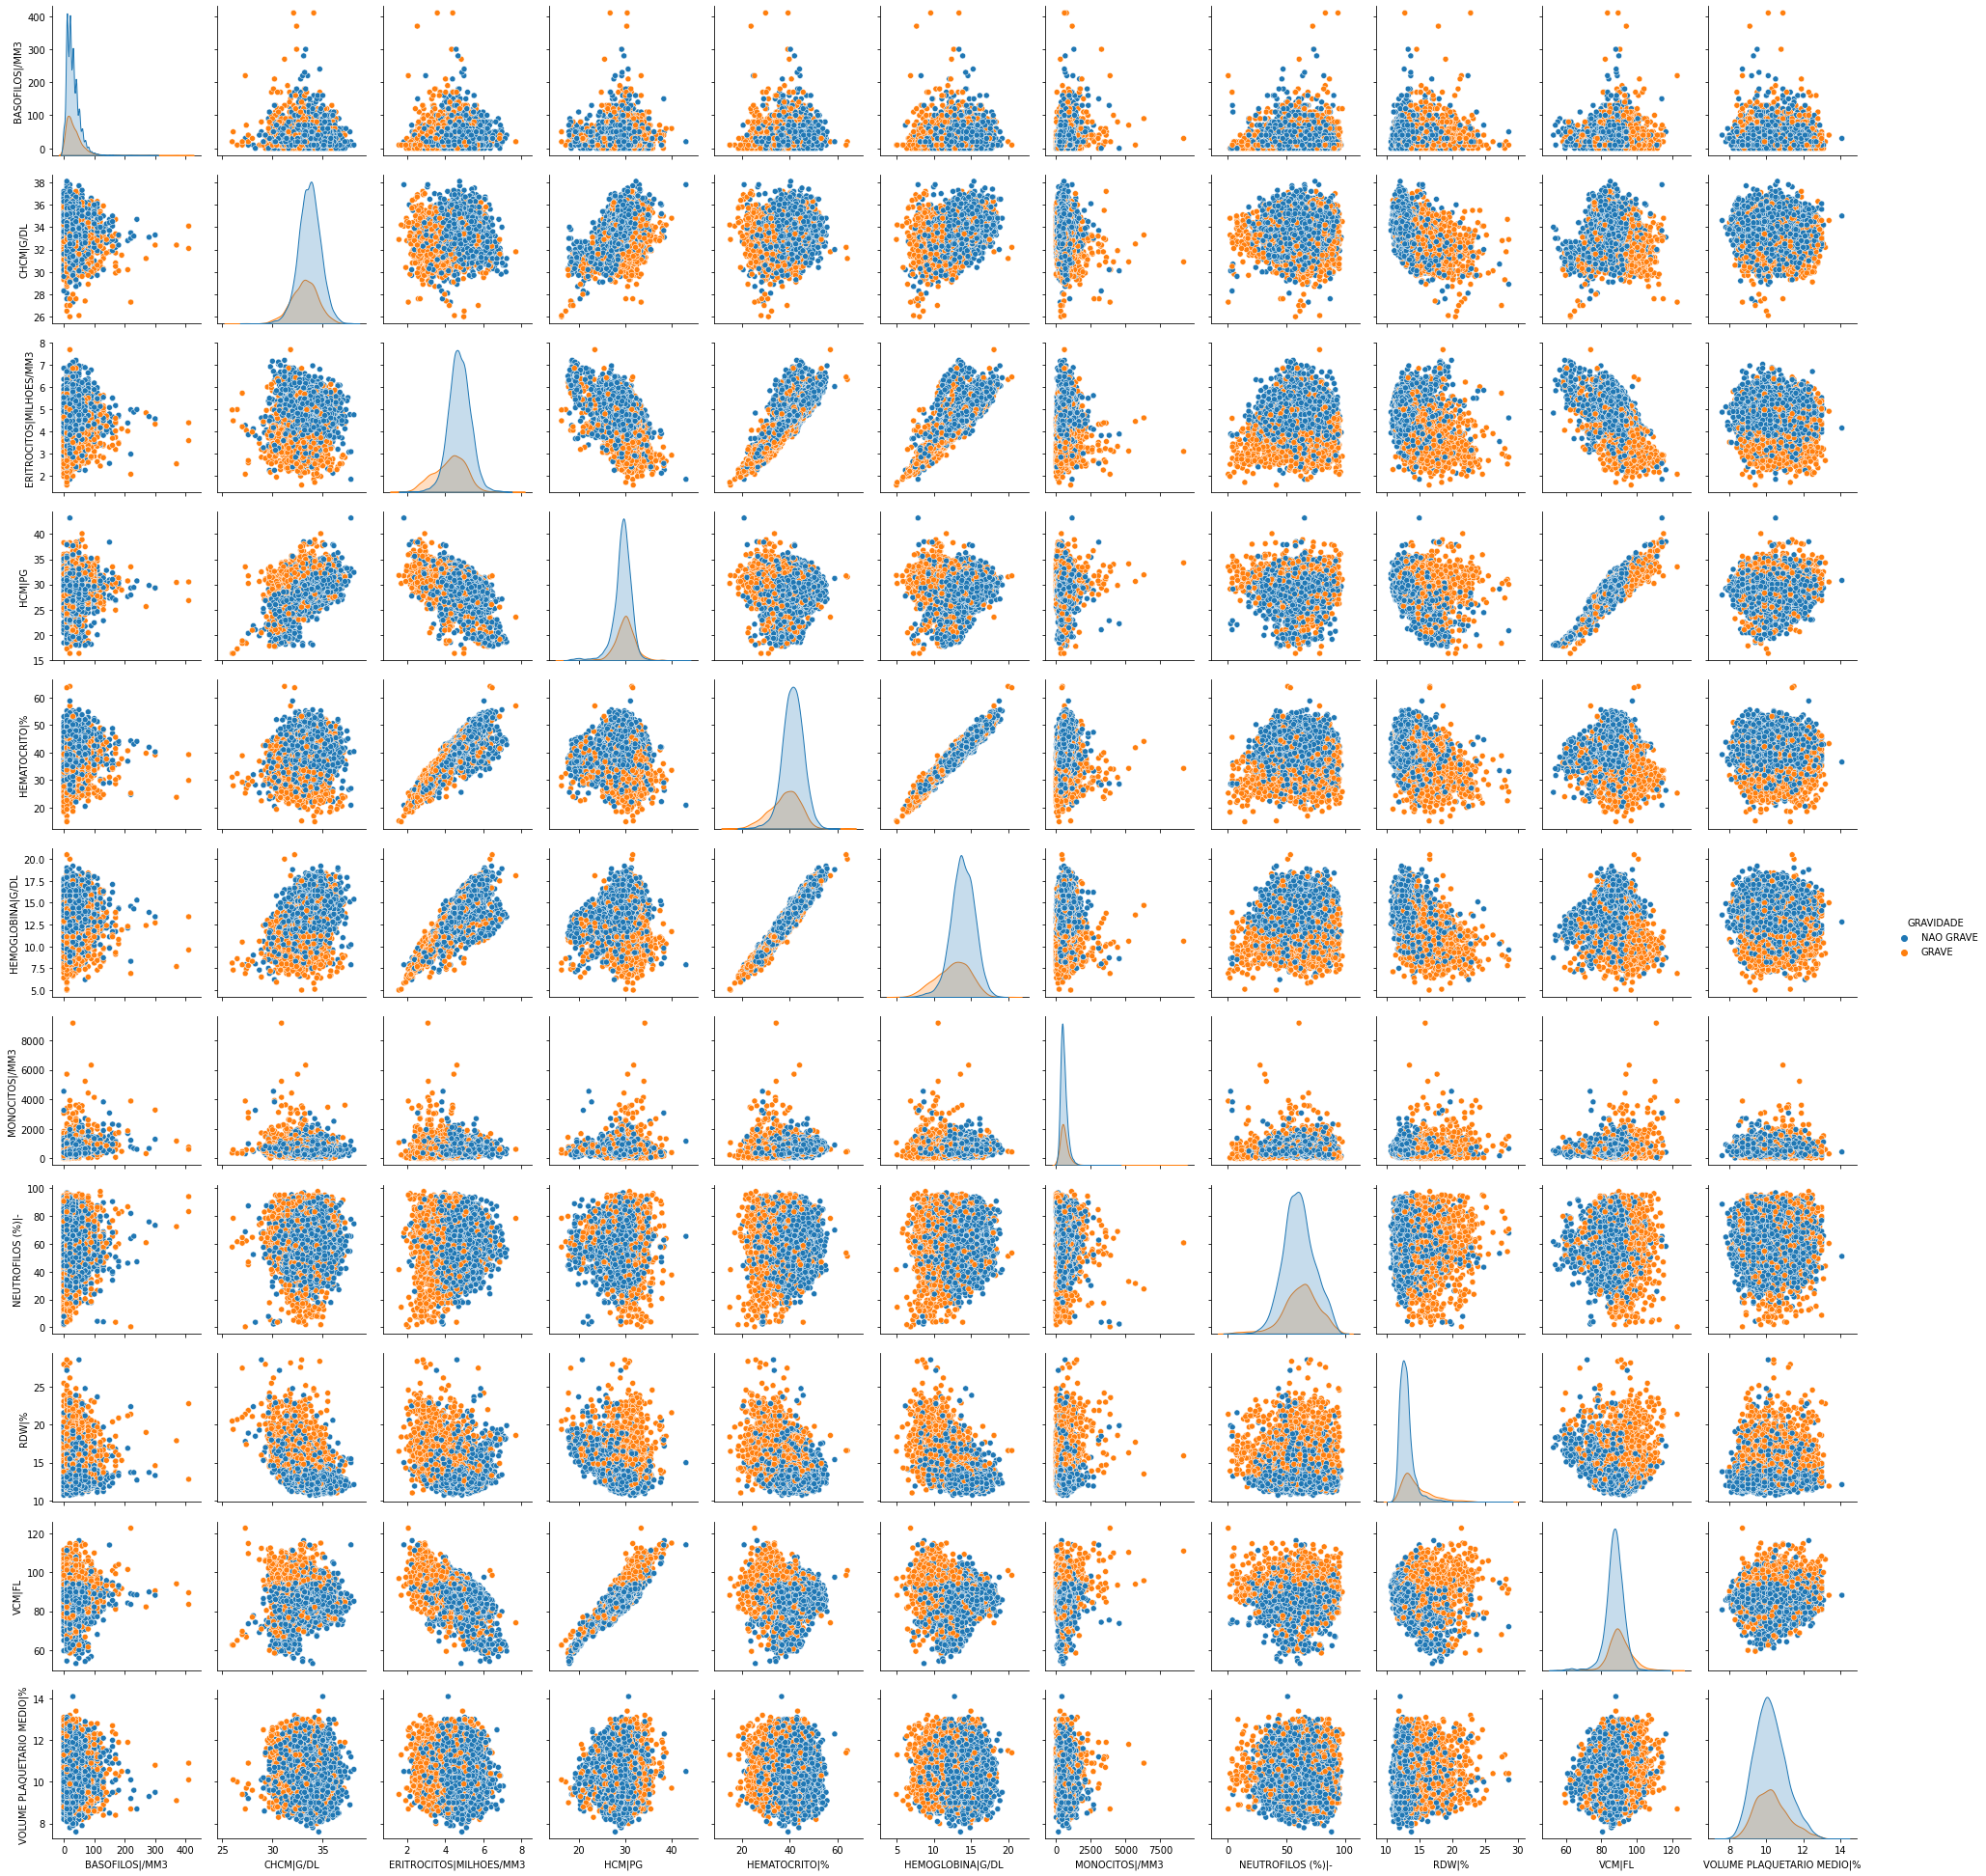

In [ ]:
sns.pairplot(df_am_explo_1, hue="GRAVIDADE")


In [ ]:
import seaborn as sns
import math
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
d_2 = {'GRAVE' : 1, 'NAO GRAVE':0}
df_am_ajustado['GRAVIDADE'] = df_am_ajustado['GRAVIDADE'].map(d_2) #colocando 0 e 1 na coluna target
df_am_ajustado.head()

,ID_PACIENTE,ID_ATENDIMENTO,IC_SEXO,DIAS_HOSPITAL,GRAVIDADE,IDADE,"""ID_PACIENTE""",BASOFILOS|/MM3,BASOFILOS (%)|-,CHCM|G/DL,...,LINFOCITOS|/MM3,LINFOCITOS (%)|-,MONOCITOS|/MM3,MONOCITOS (%)|-,NEUTROFILOS|/MM3,NEUTROFILOS (%)|-,PLAQUETAS|/MM3,RDW|%,VCM|FL,VOLUME PLAQUETARIO MEDIO|%
0,00017961865C4F766FDBB3CD8FE0BFB0,B57529234B6132E278264F273ADB99DC,1,0,NaN,55,ID_PACIENTE,40.0,0.6,34.5,...,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,13.1,86.0,9.8
1,0003B368F65004E14332CD44BEE6E600,1E774FD413636840E7CAAE47817F8120,0,0,NaN,54,ID_PACIENTE,10.0,0.2,32.8,...,1150.0,26.2,570.0,13.0,2660.0,60.6,227000.0,14.1,92.7,9.8
2,00293E8E4B5FE4DABA62131274B3685A,D952F4143E2CB3BA555494DB846562E3,0,0,NaN,74,ID_PACIENTE,30.0,0.2,33.7,...,730.0,5.5,650.0,4.9,11880.0,89.3,279000.0,13.6,77.4,10.3
3,00293E8E4B5FE4DABA62131274B3685A,DC2838FE32B8C868F82E723DABC030B3,0,0,NaN,74,ID_PACIENTE,20.0,0.5,33.9,...,870.0,22.5,610.0,15.8,2360.0,60.9,182000.0,13.6,78.6,11.1
4,00293E8E4B5FE4DABA62131274B3685A,ECC8CF9469B0EAE7E74B5803C5413CB9,0,0,NaN,74,ID_PACIENTE,10.0,0.1,34.1,...,510.0,6.8,630.0,8.4,6340.0,84.7,188000.0,13.9,78.0,10.5


In [ ]:
#NORMALIZAÇÃO

from sklearn import preprocessing
sirio_projeto = df_am_ajustado.drop(columns=['ID_PACIENTE', 'ID_ATENDIMENTO'])

In [ ]:
sirio_projeto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12703 entries, 0 to 12703
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IC_SEXO                     12703 non-null  int64  
 1   DIAS_HOSPITAL               12703 non-null  int64  
 2   GRAVIDADE                   12703 non-null  int64  
 3   IDADE                       12703 non-null  int64  
 4   "ID_PACIENTE"               12703 non-null  object 
 5   BASOFILOS|/MM3              12686 non-null  float64
 6   BASOFILOS (%)|-             12678 non-null  float64
 7   CHCM|G/DL                   12703 non-null  float64
 8   EOSINOFILOS|/MM3            12686 non-null  float64
 9   EOSINOFILOS (%)|-           12678 non-null  float64
 10  ERITROCITOS|MILHOES/MM3     12703 non-null  float64
 11  HCM|PG                      12703 non-null  float64
 12  HEMATOCRITO|%               12703 non-null  float64
 13  HEMOGLOBINA|G/DL            127

In [ ]:
sirio_projeto=sirio_projeto.drop(sirio_projeto.columns[[4, 4]], axis=1)


In [ ]:
sirio_projeto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12703 entries, 0 to 12703
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IC_SEXO                     12703 non-null  int64  
 1   DIAS_HOSPITAL               12703 non-null  int64  
 2   GRAVIDADE                   12703 non-null  int64  
 3   IDADE                       12703 non-null  int64  
 4   BASOFILOS|/MM3              12686 non-null  float64
 5   BASOFILOS (%)|-             12678 non-null  float64
 6   CHCM|G/DL                   12703 non-null  float64
 7   EOSINOFILOS|/MM3            12686 non-null  float64
 8   EOSINOFILOS (%)|-           12678 non-null  float64
 9   ERITROCITOS|MILHOES/MM3     12703 non-null  float64
 10  HCM|PG                      12703 non-null  float64
 11  HEMATOCRITO|%               12703 non-null  float64
 12  HEMOGLOBINA|G/DL            12703 non-null  float64
 13  LEUCOCITOS|/MM3             127

In [ ]:
cols = sirio_projeto.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(sirio_projeto)
novos_dados = pd.DataFrame(np_scaled, columns = cols)
novos_dados = novos_dados.fillna(novos_dados.median())
novos_dados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(novos_dados.drop(['GRAVIDADE'], axis=1), novos_dados['GRAVIDADE'],
                                                    test_size = 0.3, random_state=0)
print('Dados de treino {}'.format(X_train.shape))
print('\n')
print("Dados de teste{}". format(X_test.shape))

Dados de treino (8892, 23)


Dados de teste(3811, 23)


In [ ]:
#VALIDAÇÃO CRUZADA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

In [ ]:
# Semente aleatória para reproducibilidade dos experimentos (reproducão dos experimentos)
seed = 20

In [ ]:
scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


gscv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

algorithms = {
    # testar sem hiperparâmetros
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring=scorer,
        cv=gscv),
    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring=scorer,
        cv=gscv),
}

In [ ]:
from sklearn.model_selection import cross_val_score

result = {}
for alg, clf in algorithms.items():
  result[alg] = cross_val_score(clf, X_train, y_train, cv=cv)

result = pd.DataFrame.from_dict(result)

In [ ]:
print(result)

        kNN      tree   bigtree  svmlinear    svmrbf
0  0.795506  0.785393  0.722472   0.788764  0.807865
1  0.829213  0.811236  0.717978   0.788764  0.807865
2  0.825647  0.790776  0.717660   0.785152  0.803150
3  0.827897  0.817773  0.726659   0.798650  0.820022
4  0.817773  0.789651  0.717660   0.791901  0.807649
5  0.805399  0.805399  0.739033   0.788526  0.812148
6  0.821147  0.798650  0.713161   0.790776  0.806524
7  0.817773  0.795276  0.714286   0.796400  0.812148
8  0.790776  0.791901  0.716535   0.780652  0.797525
9  0.816648  0.781777  0.714286   0.791901  0.818898


In [ ]:
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.81 ± 0.01
tree         0.80 ± 0.01
bigtree      0.72 ± 0.01
svmlinear    0.79 ± 0.01
svmrbf       0.81 ± 0.01
dtype: object

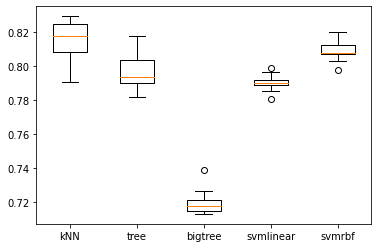

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([ scores for alg, scores in result.iteritems() ])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)
plt.show()

COMPARANDO DESEPENHO

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
# Comparar dois algoritmos:

wilcoxon(result.kNN, result.svmlinear)

WilcoxonResult(statistic=0.0, pvalue=0.005062032126267864)

F1-SCORE

In [ ]:
scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


gscv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

algorithmo = {
    # testar sem hiperparâmetros
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring='f1',
        cv=gscv),
    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring='f1',
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring='f1',
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring='f1',
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring='f1',
        cv=gscv),
}

In [ ]:
from sklearn.model_selection import cross_val_score

resultes = {}
for alg, clf in algorithmo.items():
  resultes[alg] = cross_val_score(clf, X_train, y_train, cv=cv)

resultes = pd.DataFrame.from_dict(resultes)
print(resultes)

        kNN      tree   bigtree  svmlinear    svmrbf
0  0.587963  0.559441  0.520388   0.462857  0.535065
1  0.602094  0.570093  0.499002   0.433735  0.554945
2  0.621027  0.537313  0.500994   0.460227  0.525469
3  0.607710  0.562648  0.536122   0.498599  0.586118
4  0.605923  0.491400  0.482474   0.447761  0.523677
5  0.572840  0.580046  0.532258   0.456647  0.555256
6  0.598639  0.472826  0.457380   0.432927  0.527473
7  0.611111  0.554324  0.505010   0.481375  0.561680
8  0.538813  0.500000  0.493976   0.424779  0.502762
9  0.610979  0.514019  0.515267   0.466859  0.575198


In [ ]:
resultes.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std())) #bigtree é arvore de decisão

kNN          0.60 ± 0.02
tree         0.53 ± 0.04
bigtree      0.50 ± 0.02
svmlinear    0.46 ± 0.02
svmrbf       0.54 ± 0.03
dtype: object